<a href="https://colab.research.google.com/github/ellabam/learning-java/blob/master/DATA_691_Spring_2022_Pretrained_Models_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from io import BytesIO
from PIL import Image
from matplotlib import pyplot as plt

import numpy as np

import tensorflow as tf
from tensorflow.keras.applications import ResNet50

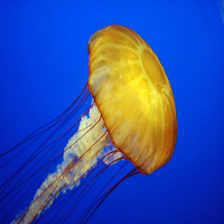

In [ ]:
response = requests.get("https://upload.wikimedia.org/wikipedia/commons/4/44/Jelly_cc11.jpg")
img = Image.open(BytesIO(response.content)).resize((224, 224))
img

In [ ]:
model = ResNet50()
model.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
x = np.array(img)[np.newaxis, :]
y_hat = model(x).numpy().squeeze()
assert np.alltrue(y_hat >= 0) and y_hat.sum() == 1

In [ ]:
I = y_hat.argsort()[::-1]
I[:5]

array([107, 818, 619, 846, 650])

In [ ]:
y_hat[I[:5]]

array([0.57837087, 0.20460773, 0.02573403, 0.0251442 , 0.01642213],
      dtype=float32)

In [ ]:
classes = (requests
           .get("https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json")
           .json())
classes = np.array(classes)

In [ ]:
classes[I[:5]]

array(['jellyfish', 'spotlight', 'lampshade', 'table lamp', 'microphone'],
      dtype='<U32')